$f(x) = kx + b\\
\phi_{0}(x) = 0, \phi_{1}(x) = x, c_{0} = b, c_{1} = k\\
F = \sum_{i=1}^{N}[y_{i} - (kx_{i} + b)]^2 \rightarrow min \\
\begin{cases}
        \frac{\partial F}{\partial b}\\
        \frac{\partial F}{\partial k}
    \end{cases}\\
\begin{cases}
        Nb + k\sum_{i=1}^{N}x_{i} = \sum_{i=1}^{N}y_{i}\\
        b \sum_{i=1}^{N}x_{i} + k \sum_{i=1}^{N}x_{i}^2 = \sum_{i=1}^{N}x_{i}y_{i}
    \end{cases}\\   
M =\begin{pmatrix}
N & \sum_{i=1}^{N}x_{i} \\
\sum_{i=1}^{N}x_{i} & \sum_{i=1}^{N}x_{i}^2
\end{pmatrix}
\vec{\xi} = \begin{pmatrix}
b \\
k
\end{pmatrix}
\vec{\mu} = \begin{pmatrix}
\sum_{i=1}^{N}y_{i}\\
\sum_{i=1}^{N}x_{i}y_{i}
\end{pmatrix}\\
\vec{\mu} = M \times \vec{\xi} $

[7.97772298 0.30042473]
График зависимости наутарльного логорифма мощности теплового излучения P от натурального логорифма температуры T температуры


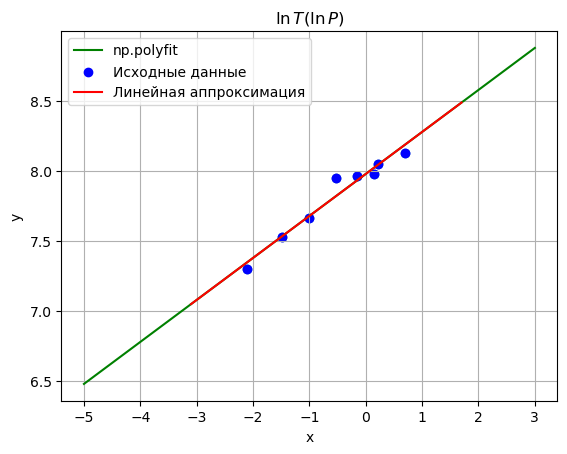

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.DataFrame({'x': [-2.10, -1.48, -1.00, -0.53, -0.16, 0.15, 0.22, 0.7],
 'y': [7.30, 7.53, 7.66, 7.95, 7.96, 7.98, 8.05, 8.13]})

x2_sum = sum([x**2 for x in df.x])
xy_sum = sum( [df.x[i] * df.y[i] for i in range(len(df.x))] )

M = np.array([[len(df.x), sum(df.x)], [sum(df.x), x2_sum]])
mu = np.array([sum(df.y), xy_sum])
xi = np.linalg.solve(M, mu)
print(xi)
x_values = (min(df.x) -1, max(df.x) + 1)
y_values = [xi[1] * x + xi[0] for x in x_values]


figsize = (6, 4)

model1 = np.poly1d(np.polyfit (df.x , df.y , 1))
polyline = np.linspace(-5, 3, 50)
plt.scatter(df.x , df.y )
plt.plot(polyline, model1(polyline), color='green', label='np.polyfit')
plt.scatter(df.x, df.y, color='blue', label='Исходные данные')
plt.plot(x_values, y_values, color='red', label='Линейная аппроксимация')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\ln{T}(\ln{P})$')
plt.legend()
plt.grid(True)
print('График зависимости наутарльного логорифма мощности теплового излучения P от натурального логорифма температуры T температуры')
plt.show()



In [14]:
delta_T = [214, 229, 244, 271, 298, 312, 333, 356]
T = [1525, 1875, 2125, 2838, 2863, 2925, 3145, 3400]
sigma = [delta_T[i] / T[i] for i in range(len(T))]
sigma

[0.14032786885245901,
 0.12213333333333333,
 0.1148235294117647,
 0.09548978153629316,
 0.10408662242403073,
 0.10666666666666667,
 0.10588235294117647,
 0.10470588235294118]

$\chi^2 = \sum_{n=1}^N (\frac{y_{i}-f(x_i)}{\sigma_i})^2$

In [15]:
f = model1(df.x)

In [16]:
chi = sum([((df.y[i] - f[i])/sigma[i]) ** 2 for i in range(len(df.y))])
chi

2.5875669664485783